# Una introducción a la regresión polinomial para cualquier grado

En este notebook implementamos algoritmos para hacer regresión polinomial de cualquier grado, comenzando con regresión cuadrática como un primer ejemplo, seguido de una implementación genérica.

## Regresión cuadrática

In [1]:
import numpy as np

def coeficientes(x: np.ndarray, t: np.ndarray) -> np.ndarray:
  """
  Devuelve [w0, w1, w2], los coeficientes de
  una regresión cuadrática.
  """

  A = np.array([
      [len(x), np.sum(x), np.sum(x ** 2)],
      [np.sum(x), np.sum(x ** 2), np.sum(x ** 3)],
      [np.sum(x ** 2), np.sum(x ** 3), np.sum(x ** 4)],
  ])
  b = np.array([
      [np.sum(t)],
      [np.sum(t * x)],
      [np.sum(t * (x ** 2))],
  ])

  return np.linalg.solve(A, b)

## Regresión polinomial para cualquier grado

In [2]:
def coeficientesM(x: np.ndarray, t: np.ndarray, m: int) -> np.ndarray:
  """
  Devuelve los coeficientes de una regresión de grado m,
  dados unos datos x = (x_1, ..., x_N), t = (t_1, ..., t_N).
  """
  A = np.zeros((m,m))
  b = np.zeros((m))
  for i in range(m):
    b[i]=np.sum(t*(x**i))
    for j in range(m):
      A[i][j]=np.sum(x**(i+j))
  A[0][0]=len(x)
  return np.linalg.solve(A, b)

## Un ejemplo usnado la función seno

La pregunta es: ¿cómo sabemos cuál grado es el mejor?, para hacerlo, revisamos cómo se comporta la función error en nuestros datos.

Explicaremos este proceso con 100 datos sacados al azar uniformemente en el intervalo [0, 1], y evaluando en una versión ruidosa de la función $\sin(2\pi x)$.

In [6]:
n_datos = 100
x = np.random.uniform(0, np.pi / 2, size=(n_datos,))
epsilon = np.random.normal(0, 1, size=(n_datos,))
t = np.sin(2*np.pi*(x) + 0.05 *epsilon)

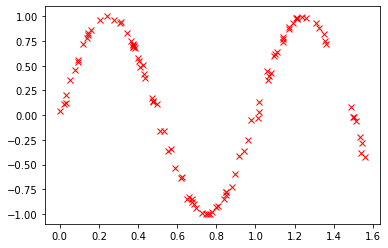

In [7]:
import matplotlib.pyplot as plt

plt.plot(x, t, "xr")

## Implementando una función error

Para la regresión, la función error suele ser la suma-de-cuadrados. Usémosla para comparar una regresión cuadrática con una regresión en más grados.

In [47]:
def error(x:np.ndarray, t:np.ndarray, y: np.ndarray)-> float:
  error_suma_de_cuadrados = (1/2) * np.sum((y-t)**2)
  return error_suma_de_cuadrados / len(t)

In [34]:
def evaluar_polinomio(x: np.ndarray, coeficientes_m: np.ndarray) -> np.ndarray:
    """
    Evalua el polinomio en x, dados los coeficientes.
    """
    resultado = 0
    for i, coeficiente in enumerate(coeficientes_m):
        resultado += coeficiente * (x ** i)

    return resultado

## Visualizando para varios grados

In [36]:
dominio = np.linspace(0, np.pi / 2, 100)

Error en grado: 2: 0.18257420260724438
Error en grado: 4: 0.013785788345739196
Error en grado: 8: 0.0006536764475147617
Error en grado: 16: 0.0006236332122719447
Error en grado: 32: 0.0006191206291641203


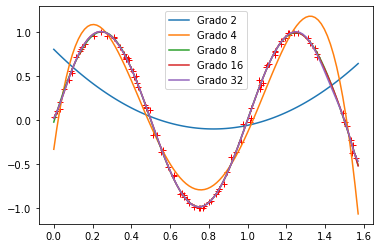

In [55]:
plt.plot(x, t, "+r")

for grado in [2, 4, 8, 16, 32]:
    coeficientes_m = coeficientesM(x, t, grado+1)
    regresion = evaluar_polinomio(dominio, coeficientes_m)
    plt.plot(dominio, regresion, label=f"Grado {grado}")
    print(f"Error en grado: {grado}: {error(x , t, evaluar_polinomio(x, coeficientes_m))}")

plt.legend()